# 一次変換と matplotlib

線形写像について、また、複素平面について、
プログラムを通じて勉強しましょう。


行列 A が与えられた時に、$det(A - \lambda I) = 0$ となる $\lambda$ のことを固有値、それぞれの $\lambda$ に対して、
$A \vec x = \lambda \vec x$ となる $x$ のことを固有値 $\lambda$ の固有ベクトルといいます。numpy には、linalg.eig という，固有値と固有ベクトルを返してくれる関数があります。この関数は、(固有値の列(を1次元配列にしたもの), 固有ベクトルの列(を1次元配列にしたもの)) というタプルを返します。ですので、2 つの変数のペアで返値を受け取るのが楽です。

In [1]:
import numpy as np
a = np.reshape(range(4), (2,2))
v, w = np.linalg.eig(a)
print(v)
print(w)

[-0.56155281  3.56155281]
[[-0.87192821 -0.27032301]
 [ 0.48963374 -0.96276969]]


** 練習問題 **
2 次元の場合で、固有値、固有ベクトルを計算するプログラムを自分でも書いてみよう。高次元になると、方程式が高次になるので、数式処理を行い，ニュートン法などで方程式を解くなどのことを考える必要があります。

Python では、画像処理に、Pillow (PIL) モジュールが広く使われています。画像を表示するだけなら、次のようにして簡単にできます。

In [2]:
from PIL import Image

im = Image.open("./logo.png")
im.show()

さらに、matplotlib と組み合わせて画像を処理することもできます。

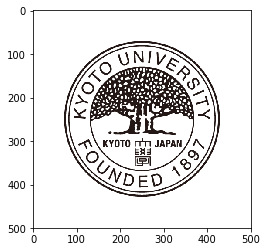

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)
plt.imshow(imarray)
plt.show()



次に定義する showimage は、x 座標、y 座標の2つの1次元配列として点の列が与えられて、それをプロットするものです。ただし、座標は [-1,1] か、それに近い大きさの数です。(x, y) という、x, y のペアをタプルで作りそれのリストにしたいところですが、numpy での行列演算をしやすくするために、このようにして点のリストを与えます。

imarray の shape を見ればわかるように、imarray は(500,500,4) の3次元配列です。
imarray(x,y,a) は，各点の色の a 成分 (a = 0,1,2,3 は，x, y, z, alpha) を表しています。
a = 0, すなわち，r 成分だけとってきた2次元配列を fst としましょう。
そして，fst(x,y) が 0 でない点の座標 (x, y) だけを取り出して，それを
[-1,1]x[-1,1] の範囲に座標変換した値 (x, y) のリスト original を作ります。
それに，分かりやすいように x, y 軸に並行な線をいれます。
x 成分，y 成分だけの配列 figx, figy を作り，それらからなる ndarray である fig を作ります。
それを showimage で描画します。* によって，リスト，タプルなどを，内容の列にして多引数の関数に適用できる話を以前しました。これは，ndarray に対しても適用できるので，fig を展開して figx, figy を showimage に渡しています。



(500, 500, 4)


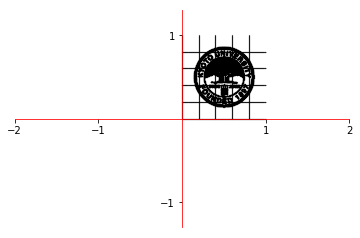

In [19]:
def showimage(xs, ys):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter(xs, ys, s=0.01, c="black")  # 0,01 は点のサイズ。
    plt.ylim([-3,3])
    # 座標軸の設定
#    ax = plt.gca()  # gca は get current axis の意味
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
  
print(imarray.shape)
fst= imarray[:,:,0]
#original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]
original = [(y/500,((500-x)/500)) for x in range(500) for y in range(500) if fst[x,y] != 0]
lines1 = [(x/500, y/500) for x in range(0, 500, 100) for y in range(0, 500)]
lines2 = [(x/500, y/500) for y in range(0, 500, 100) for x in range(0, 500)]
figTuple = original + lines1 + lines2


figx = np.array([x for (x,y) in figTuple])
figy = np.array([y for (x,y) in figTuple])
fig = np.array([figx, figy])
showimage(*fig)

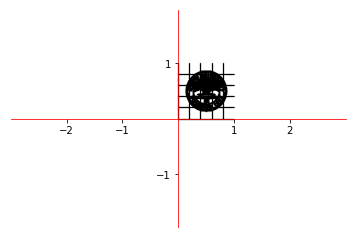

In [10]:
import matplotlib.pyplot as plt
import numpy as np
f, ax = plt.subplots()
ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
plt.scatter(figx, figy, s=0.01, c="black")  # 0,01 は点のサイズ。
ax.set_xlim(-3,3)
ax.set_ylim(-2, 2)
for d in ['bottom', 'left']:
    ax.spines[d].set_position(('data', 0))
    ax.spines[d].set_color('red')
ax.set_xticks([-2,-1,1, 2])
ax.set_yticks([-2,-1,1, 2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

元の画像が白黒画像だったので，これでも，元と同じ画像が，[-1,1]x[-1,1] の範囲で作られていることが分かります。さて，fig には黒い点の x座標, y 座標の列からなる配列がはいっています。
それに座標変換を行い，絵がどうなるか見てみましょう。
座標変換後の x座標, y 座標の列からなる配列を得るには，変換行列を左からかければいいはずです。

よって，次のようにして，行列で変換した点を表示できます。ここでは，a は，x 成分を2倍，y 成分はそのままという一次変換行列です。

In [11]:
fig

array([[0.468, 0.47 , 0.472, ..., 0.994, 0.996, 0.998],
       [0.858, 0.858, 0.858, ..., 0.8  , 0.8  , 0.8  ]])

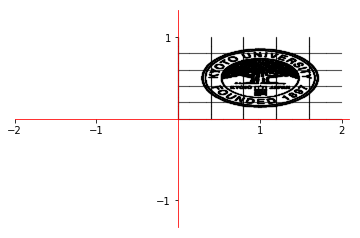

In [12]:
a = np.array([[2,0],[0,1]])
newfig = a@fig
showimage(*newfig)


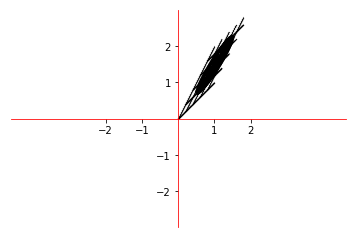

In [21]:
showimage(*np.array([[1,1],[2,1]])@fig)

**練習問題** 与えられた t に対して，t だけの回転行列を考え，それをかけることにより，x 座標および y 座標の列からなる ndarray を，回転後の座標の列からなる ndarray に変換するメソッドを作ろう。それで，
[figx, figy] の絵を変換した絵を作ろう。

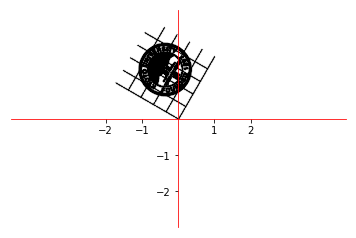

In [15]:
def rotate(t, fig):
    u = t * np.pi/180
    a = np.array([[np.sin(u),-np.cos(u)],[np.cos(u),np.sin(u)]])
    return a@fig

showimage(*(2*rotate(30, fig)))

In [16]:
showimage(*rotate(30)@np.array([figx,figy]))

TypeError: rotate() missing 1 required positional argument: 'fig'

**練習問題** (xx, yy) をもらい，xx, yy だけ平行移動を行うにはどうすればよいか考えましょう。
それは，(x, y) の代わりに (x, y, 1) を考えて，　
`[[1,0,xx],[0,1,yy]]` という行列との掛け算をすればよいはずです。figx の長さは，
`figx.shape[0]` でとって来れます。また，[1,1,1...,1] という大きさ n のリストは [1]*n　でできます。

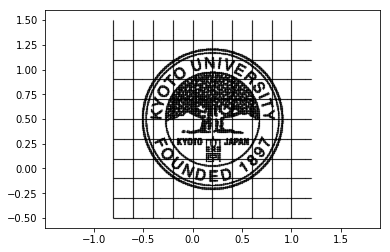

In [24]:
def trans(xx,yy):
    return np.array([[1,0,xx],[0,1,yy]])
showimage(*trans(0.2,0.5)@np.array([figx,figy,[1]*(figx.shape[0])]))

In [16]:
dir(__name__)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [17]:
a = 1


In [18]:
dir()

['In',
 'Out',
 '_',
 '_1',
 '_10',
 '_13',
 '_14',
 '_15',
 '_16',
 '_5',
 '_6',
 '_7',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'b',
 'exit',
 'get_ipython',
 'quit']

In [19]:
type(upper)

NameError: name 'upper' is not defined